<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [51]:


import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [52]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [53]:
data = load_data('GOOG')  # Replace 'TCS.NS' with the desired stock ticker
df=data
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_30656\1794888428.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04,15.517998,15.586333,15.455851,15.522949,78541293
1,2010-01-05,15.449662,15.544986,15.389001,15.528644,120638494
2,2010-01-06,15.060196,15.495962,15.013153,15.495962,159744526
3,2010-01-07,14.709600,15.103276,14.673699,15.088421,257533695
4,2010-01-08,14.905696,14.936150,14.586051,14.657605,189680313


In [54]:
df = df.drop(['Date',], axis = 1)
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_30656\3800106837.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date',], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
0,15.517998,15.586333,15.455851,15.522949,78541293
1,15.449662,15.544986,15.389001,15.528644,120638494
2,15.060196,15.495962,15.013153,15.495962,159744526
3,14.709600,15.103276,14.673699,15.088421,257533695
4,14.905696,14.936150,14.586051,14.657605,189680313


Visualizing Closing Price

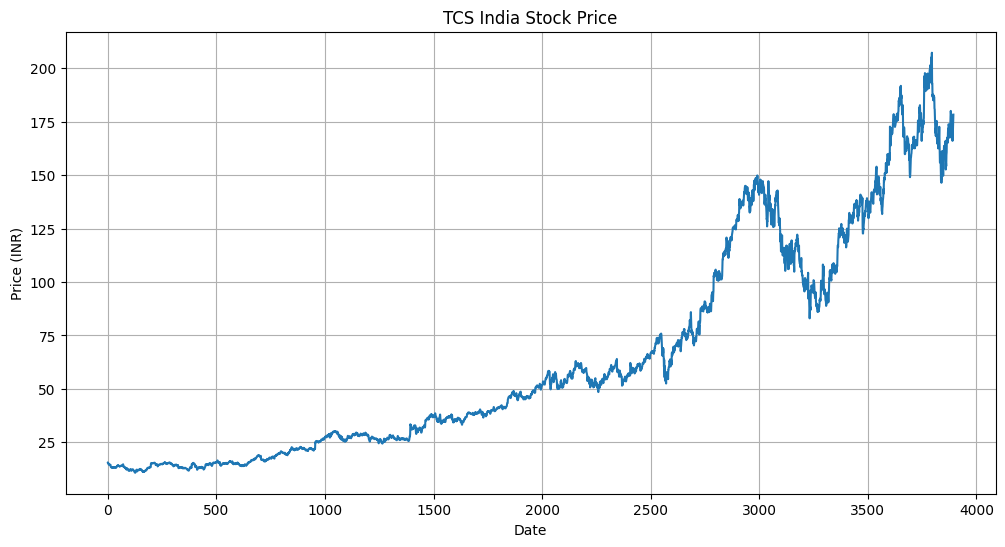

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [56]:
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
0,15.517998,15.586333,15.455851,15.522949,78541293
1,15.449662,15.544986,15.389001,15.528644,120638494
2,15.060196,15.495962,15.013153,15.495962,159744526
3,14.709600,15.103276,14.673699,15.088421,257533695
4,14.905696,14.936150,14.586051,14.657605,189680313
...,...,...,...,...,...
3890,166.009995,168.479996,163.330002,167.320007,36975600
3891,167.740005,169.250000,166.910004,167.684998,27310300
3892,171.490005,173.360001,168.561005,168.649994,23627400


# Plotting moving averages of 100 day

---



In [57]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3890,170.083630
3891,169.793839
3892,169.487175
3893,169.180280


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

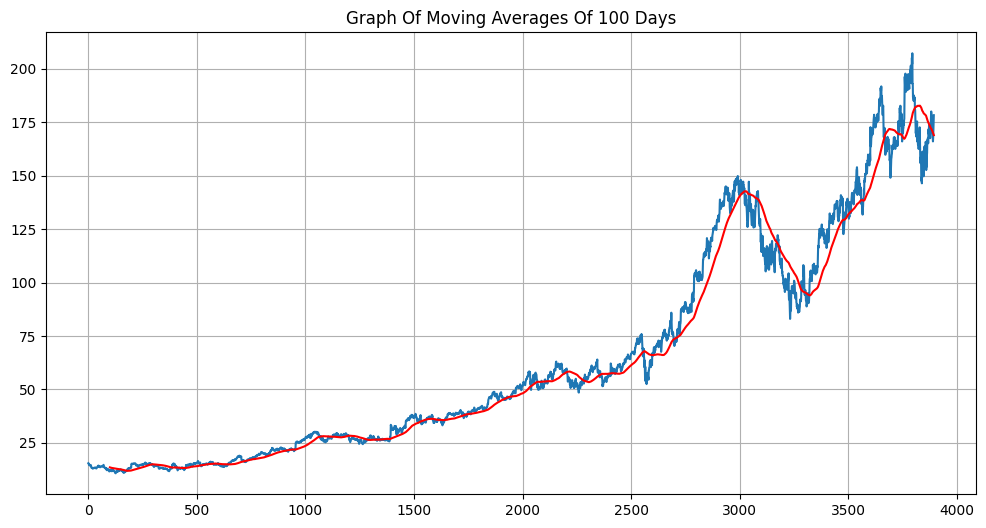

In [58]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [59]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3890,173.046224
3891,173.099644
3892,173.167883
3893,173.283017


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

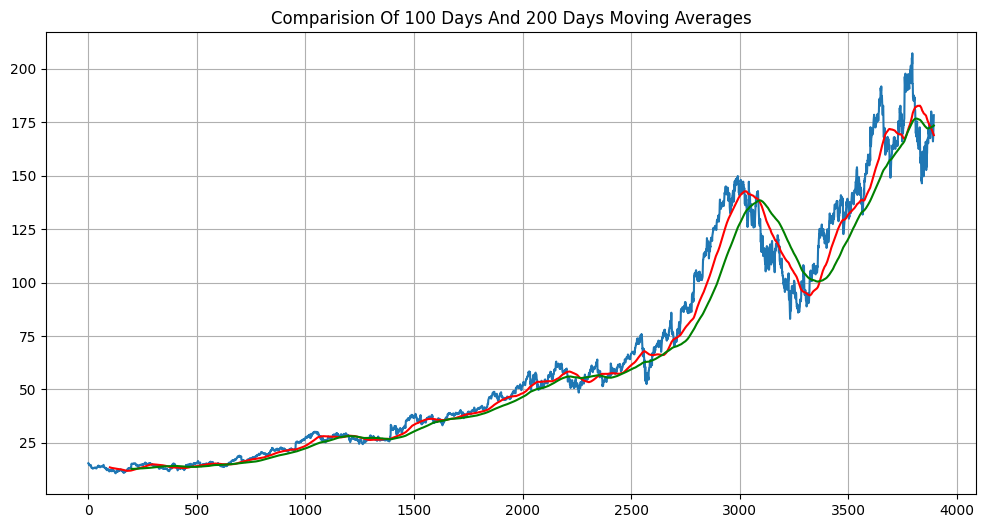

In [60]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [61]:
df.shape

(3895, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [62]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2726, 6)
(1169, 6)


In [63]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04,15.517998,15.586333,15.455851,15.522949,78541293
1,2010-01-05,15.449662,15.544986,15.389001,15.528644,120638494
2,2010-01-06,15.060196,15.495962,15.013153,15.495962,159744526
3,2010-01-07,14.709600,15.103276,14.673699,15.088421,257533695
4,2010-01-08,14.905696,14.936150,14.586051,14.657605,189680313


In [64]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
2726,2020-10-30,80.571571,83.851574,79.748962,83.111474,86582000
2727,2020-11-02,80.821083,82.547819,80.324038,80.926952,50708000
2728,2020-11-03,82.022942,82.594048,80.353369,81.106886,33234000
2729,2020-11-04,86.939705,88.044891,84.797440,85.008686,71418000
2730,2020-11-05,87.647514,89.152067,87.008308,88.523806,41316000


# Using MinMax scaler for normalization of the dataset

---



In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [66]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [67]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.06300738],
       [0.06308421],
       [0.06264332],
       ...,
       [0.92353124],
       [0.89943931],
       [0.87437521]])

In [68]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [69]:
x_train.shape

(2626, 100, 1)

# ML Model (LSTM)

---



In [70]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [71]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [73]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - loss: 0.0637 - mean_absolute_error: 0.1693
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0067 - mean_absolute_error: 0.0569
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0048 - mean_absolute_error: 0.0469
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.0045 - mean_absolute_error: 0.0447
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.0047 - mean_absolute_error: 0.0482
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0044 - mean_absolute_error: 0.0454
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0039 - mean_absolute_error: 0.0425
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0039 - mean_absolute_error: 0.0422
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0041 - mean_absolute_error: 0.0424
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0036 - mean_absolute_error: 0.0406
Epoch 11/100
8

In [79]:
model.save_weights('keras_model.weights.h5')



In [80]:
test_close.shape

(1169, 1)

In [81]:
past_100_days = pd.DataFrame(train_close[-100:])

In [82]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [83]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [84]:
final_df.head()

,0
0,72.545772
1,71.697812
2,71.002450
3,69.129089
4,71.834001


In [85]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03690489],
       [0.03069338],
       [0.02559969],
       ...,
       [0.74089128],
       [0.77557629],
       [0.78469629]])

In [86]:
input_data.shape

(1269, 1)

# Testing the model

---



In [87]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [88]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1169, 100, 1)
(1169,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [89]:
# Making predictions

y_pred = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [90]:
y_pred.shape

(1169, 1)

In [91]:
y_test

array([0.11430118, 0.09829904, 0.09961709, ..., 0.74089128, 0.77557629,
       0.78469629])

In [92]:
y_pred

array([[0.12269001],
       [0.12484556],
       [0.12696132],
       ...,
       [0.81265473],
       [0.79975075],
       [0.78749883]], dtype=float32)

In [93]:
scaler.scale_

array([0.00732524])

In [94]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

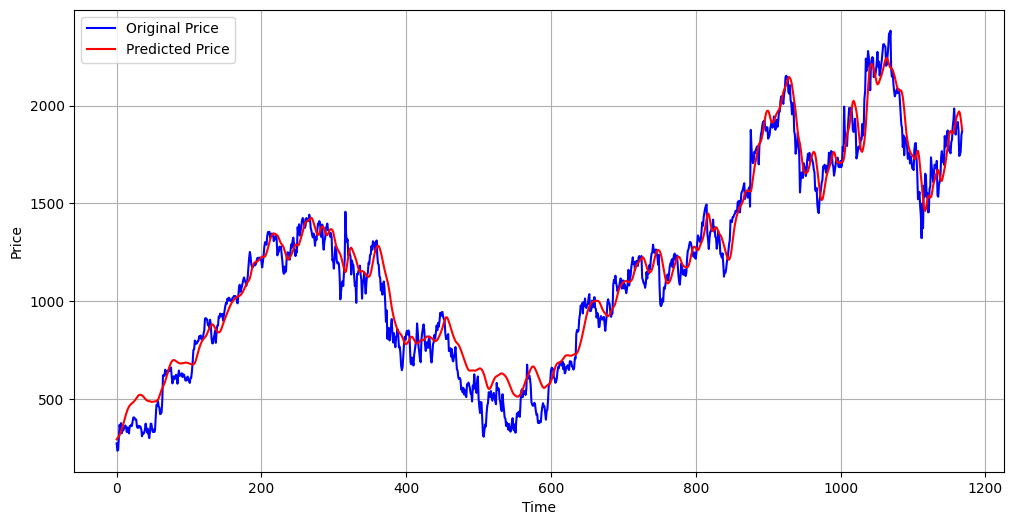

In [95]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [96]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 6.63%


Calculation of R2 score

In [98]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9633406855449275


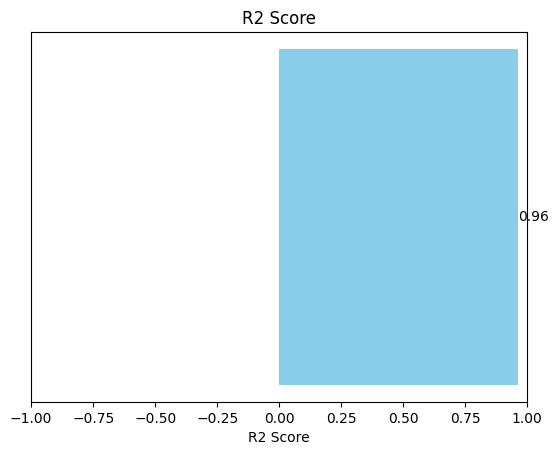

In [99]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

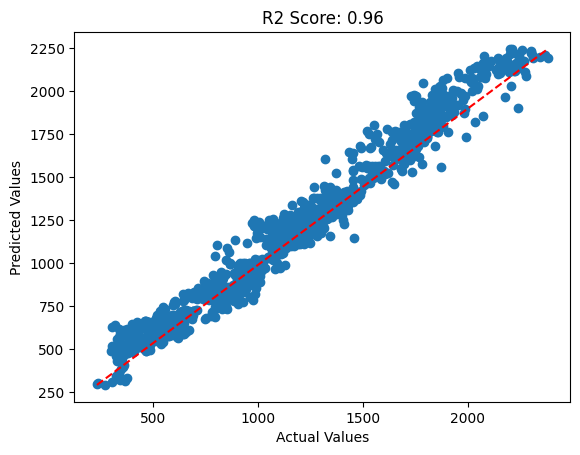

In [100]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()